# Predicting EPL Football Match Winners

Addison 2023-05-16

## Introduction

This project aims to build a model to predict the winning team of a future EPL (English Premier League) football match based on historical data about both participating teams in the EPL system. To this end, this project will use a dataset that contains 8696 rows, each of which represents information about an EPL football match from season 2000-2001 to the latest one (2022-2023) (the most recent matches in the dataset were on 08/05/2023). The dataset could be obtained through this link:

https://www.football-data.co.uk/englandm.php


Here are the descriptions for relevant columns:

**Date** - Match Date

**HomeTeam** - Home Team

**AwayTeam** - Away Team

**Referee** - Match Referee

**FTHG** - Full-Time Home Team Goals

**FTAG** - Full-Time Away Team Goals

**HTHG** - Half-Time Home Team Goals

**HTAG** - Half-Time Away Team Goals

**HTR** - Half-Time Result (H=Home Win, D=Draw, A=Away Win)

**FTR** - Full-Time Result (H=Home Win, D=Draw, A=Away Win)

**HS** - Home Team Shots
                
**AS** - Away Team Shots

**HST** - Home Team Shots on Target

**AST** - Away Team Shots on Target

**HHW** - Home Team Hit Woodwork

**AHW** - Away Team Hit Woodwork

**HC** - Home Team Corners

**AC** - Away Team Corners

**HF** - Home Team Fouls Committed

**AF** - Away Team Fouls Committed

**HO** - Home Team Offsides

**AO** - Away Team Offsides

**HY** - Home Team Yellow Cards

**AY** - Away Team Yellow Cards

**HR** - Home Team Red Cards

**AR** - Away Team Red Cards

## Exploring and cleaning the data

First, let's import the necessary libraries and read all the files, each containing a dataset of an EPL football season from 2000 until now (May 2023). After that, we'll integrate all the datasets into one variable named **data**. 

In [1]:
import pandas as pd
import numpy as np
import glob
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
path = r'/Users/apple/Downloads/EPL copy' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

file_list = []

for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0)
    file_list.append(df)

data = pd.concat(file_list, axis=0, ignore_index=True)

Now, let's quickly look at the first few rows to see how the data looks.

In [3]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgCAHH,AvgCAHA,Attendance,HHW,AHW,HO,AO,SBH,SBD,SBA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some seasons have betting information while some do not. That's why we see several columns containing null values. Since this project aims to predict football matches based on elements that have direct influences on the participating teams' performance, we'll remove betting columns.

In [4]:
data_1 = data.loc[:, 'Div':'AR']

In [5]:
data_1.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
8702,E0,11/05/02,Liverpool,Ipswich,5,0,H,2,0,H,...,8,2,13,5,0,7,0,0,0,0
8703,E0,11/05/02,Man United,Charlton,0,0,D,0,0,D,...,6,6,8,7,7,4,2,0,0,0
8704,E0,11/05/02,Southampton,Newcastle,3,1,H,2,0,H,...,3,8,15,11,3,6,0,1,1,0
8705,E0,11/05/02,Sunderland,Derby,1,1,D,1,0,H,...,12,3,11,14,4,2,0,1,0,0
8706,E0,11/05/02,West Ham,Bolton,2,1,H,1,0,H,...,10,4,9,13,9,5,2,1,0,0


In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       8707 non-null   object
 1   Date      8707 non-null   object
 2   HomeTeam  8707 non-null   object
 3   AwayTeam  8707 non-null   object
 4   FTHG      8707 non-null   int64 
 5   FTAG      8707 non-null   int64 
 6   FTR       8707 non-null   object
 7   HTHG      8707 non-null   int64 
 8   HTAG      8707 non-null   int64 
 9   HTR       8707 non-null   object
 10  Referee   8707 non-null   object
 11  HS        8707 non-null   int64 
 12  AS        8707 non-null   int64 
 13  HST       8707 non-null   int64 
 14  AST       8707 non-null   int64 
 15  HF        8707 non-null   int64 
 16  AF        8707 non-null   int64 
 17  HC        8707 non-null   int64 
 18  AC        8707 non-null   int64 
 19  HY        8707 non-null   int64 
 20  AY        8707 non-null   int64 
 21  HR        8707

In [7]:
data_1.nunique()

Div            1
Date        2392
HomeTeam      46
AwayTeam      46
FTHG          10
FTAG           9
FTR            3
HTHG           6
HTAG           6
HTR            3
Referee      177
HS            40
AS            32
HST           24
AST           21
HF            30
AF            29
HC            21
AC            20
HY             8
AY            10
HR             4
AR             3
dtype: int64

From the tables above, it's evident that our dataset is clear of null values now. We also notice that the Div column contains only one unique value, which is E0, representing the EPL tournament. Since this information is also useless for our prediction model development, we're going to remove this column as well.

In [8]:
data_1 = data_1.loc[:, 'Date':'AR']

## Data engineering

Next, we are going to convert the datatype of the column **Date** from object to datetime. We'll also create a new column named **Weekday** representing the day of the week that the match happened.

In [9]:
data_1["Date"] = pd.to_datetime(data_1['Date'], dayfirst=True)
data_1["Weekday"] = data_1["Date"].apply(lambda x: x.strftime("%A"))

Then, we'll create a column called **Target** showing the full-time result of the corresponding match. 

If the Home Team won, it will be marked as 1. Otherwise (drew or lost), it will be marked as 0.

In [10]:
data_1["Target"] = (data_1["FTR"] == "H").astype("int")

Now, we're about to create two columns called **FTR_code** and **HTR_code** illustrating the full-time and half-time results respectively of the corresponding match. 

If the Home Team won, it will be marked as 2. If the Home Team lost, it will be marked as 0. If the Home Team drew, it will be marked as 1. 

Afterward, we'll arrange the dataset from the earliest date to the most recent one.

In [11]:
data_1["FTR_code"] = data_1["FTR"].astype("category").cat.codes
data_1["HTR_code"] = data_1["HTR"].astype("category").cat.codes

In [12]:
data_1 = data_1.sort_values("Date")

In [13]:
data_1.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HC,AC,HY,AY,HR,AR,Weekday,Target,FTR_code,HTR_code
3040,2000-08-19,Charlton,Man City,4,0,H,2,0,H,Rob Harris,...,6,6,1,2,0,0,Saturday,1,2,2
3048,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,Alan Wiley,...,3,4,0,0,0,0,Saturday,1,2,2
3047,2000-08-19,Sunderland,Arsenal,1,0,H,0,0,D,Steve Dunn,...,2,9,3,1,0,1,Saturday,1,2,1
3046,2000-08-19,Liverpool,Bradford,1,0,H,0,0,D,Paul Durkin,...,6,1,1,1,0,0,Saturday,1,2,1
3041,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,...,7,7,1,2,0,0,Saturday,1,2,2


Next, we're going to create several new statistical columns based on the current ones as additional predictive elements for our prediction model:
- **FTHG/FTAG**: the ratio between **FTHG** and **FTAG** of the corresponding match
- **HTHG/HTAG**: the ratio between **HTHG** and **HTAG** of the corresponding match
- **HTR_code/FTR_code**: the ratio between **HTR_code** and **FTR_code** of the corresponding match
- **HS/AS**: the ratio between **HS** and **AS** of the corresponding match
- **HST/AST**: the ratio between **HST** and **AST** of the corresponding match
- **HC/AC**: the ratio between **HC** and **AC** of the corresponding match
- **HF/AF**: the ratio between **HF** and **AF** of the corresponding match
- **HY/AY**: the ratio between **HY** and **AY** of the corresponding match
- **HR/AR**: the ratio between **HR** and **AR** of the corresponding match

Both the numerator and denominator of each ratio are plus one to avoid the bad effect of zero values.

In [14]:
data_1["FTHG/FTAG"] = (data_1["FTHG"]+1)/(data_1["FTAG"]+1)
data_1["HTHG/HTAG"] = (data_1["HTHG"]+1)/(data_1["HTAG"]+1)
data_1["HTR_code/FTR_code"] = (data_1["HTR_code"]+1)/(data_1["FTR_code"]+1)
data_1["HS/AS"] = (data_1["HS"]+1)/(data_1["AS"]+1)
data_1["HST/AST"] = (data_1["HST"]+1)/(data_1["AST"]+1)
data_1["HC/AC"] = (data_1["HC"]+1)/(data_1["AC"]+1)
data_1["HF/AF"] = (data_1["HF"]+1)/(data_1["AF"]+1)
data_1["HY/AY"] = (data_1["HY"]+1)/(data_1["AY"]+1)
data_1["HR/AR"] = (data_1["HR"]+1)/(data_1["AR"]+1)

In [15]:
data_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HTR_code,FTHG/FTAG,HTHG/HTAG,HTR_code/FTR_code,HS/AS,HST/AST,HC/AC,HF/AF,HY/AY,HR/AR
3040,2000-08-19,Charlton,Man City,4,0,H,2,0,H,Rob Harris,...,2,5.000000,3.00,1.000000,2.000000,3.000000,1.000000,1.076923,0.666667,1.0
3048,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,Alan Wiley,...,2,2.000000,1.50,1.000000,1.312500,1.166667,0.800000,1.071429,1.000000,1.0
3047,2000-08-19,Sunderland,Arsenal,1,0,H,0,0,D,Steve Dunn,...,1,2.000000,1.00,0.666667,0.600000,0.375000,0.300000,0.500000,2.000000,0.5
3046,2000-08-19,Liverpool,Bradford,1,0,H,0,0,D,Paul Durkin,...,1,2.000000,1.00,0.666667,4.250000,3.666667,3.500000,1.000000,1.000000,1.0
3041,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,...,2,1.666667,2.00,1.000000,1.384615,1.833333,1.000000,1.333333,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8322,2023-05-07,Newcastle,Arsenal,0,2,A,0,1,A,C Kavanagh,...,0,0.333333,0.50,1.000000,1.181818,0.857143,2.000000,1.307692,1.500000,1.0
8323,2023-05-07,West Ham,Man United,1,0,H,1,0,H,P Bankes,...,2,2.000000,2.00,1.000000,0.800000,1.000000,0.857143,0.500000,0.333333,1.0
8324,2023-05-08,Fulham,Leicester,5,3,H,3,0,H,R Jones,...,2,1.500000,4.00,1.000000,0.947368,0.800000,0.375000,0.875000,0.250000,1.0
8325,2023-05-08,Brighton,Everton,1,5,A,0,3,A,S Hooper,...,0,0.333333,0.25,1.000000,2.181818,1.000000,8.000000,0.857143,0.333333,1.0


Now, we're going to create lists of columns for new predictive metrics that we will create later.

In [16]:
numeric_cols = data_1.select_dtypes(include=np.number).columns
numeric_cols

Index(['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'Target', 'FTR_code', 'HTR_code',
       'FTHG/FTAG', 'HTHG/HTAG', 'HTR_code/FTR_code', 'HS/AS', 'HST/AST',
       'HC/AC', 'HF/AF', 'HY/AY', 'HR/AR'],
      dtype='object')

In [17]:
new_cols_1 = [f"{col}_b_e" for col in numeric_cols]

new_cols_2 = [f"{col}_h_m3" for col in numeric_cols]
new_cols_3 = [f"{col}_h_m5" for col in numeric_cols]
new_cols_4 = [f"{col}_h_m7" for col in numeric_cols]
new_cols_5 = [f"{col}_h_m10" for col in numeric_cols]

new_cols_6 = [f"{col}_a_m3" for col in numeric_cols]
new_cols_7 = [f"{col}_a_m5" for col in numeric_cols]
new_cols_8 = [f"{col}_a_m7" for col in numeric_cols]
new_cols_9 = [f"{col}_a_m10" for col in numeric_cols]

new_cols_10 = [f"{col}_m3" for col in numeric_cols]

Next, we'll create functions called **expanding_mean_1** and **expanding_mean_2** to compute the expanding mean (cumulative mean) for each numeric column in the dataset. 

A cumulative mean in a row represents the mean of all previous values in the corresponding numeric column.

The function **expanding_mean_1** also removes rows containing null values, which result from the application of the function.

New expanding mean columns will be named after their corresponding current columns with the suffix **\_b_e**.

The **expanding_mean_1** function will be used for creating metrics to evaluate the predictive model while the **expanding_mean_2** function will be used in another function to predict the result of a future football match.

In [18]:
def expanding_mean_1(team, numeric_cols, new_cols_1):
    
    expanding_mean_1 = team[numeric_cols].expanding(1).mean()
    team[new_cols_1] = expanding_mean_1
    team[new_cols_1] = team[new_cols_1].shift(1, axis = 0)
  
    team = team.dropna(axis = 0)

    return team

In [19]:
def expanding_mean_2(team, numeric_cols, new_cols_1):
    
    expanding_mean_1 = team[numeric_cols].expanding(1).mean()
    team[new_cols_1] = expanding_mean_1
  
    team = team.dropna(axis = 0)

    return team

Now, we're about to apply the **expanding_mean_1** function to our dataset to calculate the cumulative mean of each statistic of historical head-to-head matches for each pair of Home Team and Away Team. In other words, we use this kind of metric to evaluate both participating teams' performance based on their historical head-to-head matches.

The resulting dataframe will be assigned to variable **concat_df**.

In [20]:
#stat of both before(expanding)

df_list = []
for home in data_1["HomeTeam"].unique():
    for away in data_1["HomeTeam"].unique():
        df = data_1[(data_1["HomeTeam"] == home) & (data_1["AwayTeam"] == away)].copy()
        rolling_df = expanding_mean_1(df, numeric_cols, new_cols_1)

        df_list.append(rolling_df)
concat_df = pd.concat(df_list)
concat_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HTR_code_b_e,FTHG/FTAG_b_e,HTHG/HTAG_b_e,HTR_code/FTR_code_b_e,HS/AS_b_e,HST/AST_b_e,HC/AC_b_e,HF/AF_b_e,HY/AY_b_e,HR/AR_b_e
8472,2001-12-08,Charlton,Tottenham,3,1,H,2,0,H,S. W. Dunn,...,2.000000,2.000000,2.000000,1.000000,0.909091,1.000000,1.333333,0.818182,1.000000,1.0
2301,2002-08-27,Charlton,Tottenham,0,1,A,0,1,A,A Wiley,...,2.000000,2.000000,2.500000,1.000000,0.854545,1.083333,1.166667,0.832168,1.500000,1.0
7464,2004-02-11,Charlton,Tottenham,2,4,A,0,2,A,G Barber,...,1.333333,1.500000,1.833333,1.000000,1.028030,1.722222,1.011111,0.693667,1.222222,1.0
1047,2005-03-16,Charlton,Tottenham,2,0,H,1,0,H,C Foy,...,1.000000,1.275000,1.458333,1.000000,1.136407,1.632576,1.308333,0.753584,1.916667,1.0
5007,2005-10-01,Charlton,Tottenham,2,3,A,1,0,H,P Dowd,...,1.200000,1.620000,1.566667,1.000000,1.059126,1.426061,1.446667,0.791102,1.613333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,2023-04-08,Brentford,Newcastle,1,2,A,1,0,H,C Kavanagh,...,0.000000,0.333333,0.333333,1.000000,0.259259,0.166667,1.000000,1.250000,2.000000,2.0
8288,2023-04-22,Brentford,Aston Villa,1,1,D,0,0,D,M Salisbury,...,1.000000,1.500000,1.000000,0.666667,0.647059,0.833333,0.500000,1.500000,1.000000,1.0
8098,2022-10-29,Brentford,Wolves,1,1,D,0,0,D,R Madley,...,1.000000,0.666667,1.000000,2.000000,1.500000,0.666667,1.750000,0.875000,0.750000,1.0
8202,2023-02-18,Brentford,Crystal Palace,1,1,D,0,0,D,P Tierney,...,1.000000,1.000000,1.000000,1.000000,1.428571,0.750000,0.400000,1.000000,2.000000,1.0


Next, we'll create a function called **rolling_mean_1** and **rolling_mean_2** to calculate the moving average for each numeric column in the dataset. 

Rolling means in a row represent the mean of the previous three, five, seven, and ten values in the corresponding numeric column.

The function **rolling_mean_1** also removes rows containing null values, which result from the application of the function.

New rolling mean columns will be named after their corresponding current columns with a suffix **\_x_m3/5/7/10**.
- **x = h**: the stat for the home team
- **x = a**: the stat for the away team
- **3/5/7/10**: the stat for previous 3/5/7/10 matches


The **rolling_mean_1** function will be used for creating metrics to evaluate the predictive model while the **rolling_mean_2** function will be used in another function to predict the result of a future football match.

In [21]:
def rolling_mean_1(team, numeric_cols, new_cols_1, new_cols_2, new_cols_3, new_cols_4):
    
    rolling_mean_1 = team[numeric_cols].rolling(3, closed='left').mean()
    team[new_cols_1] = rolling_mean_1
    
    rolling_mean_2 = team[numeric_cols].rolling(5, closed='left').mean()
    team[new_cols_2] = rolling_mean_2
 
    rolling_mean_3 = team[numeric_cols].rolling(7, closed='left').mean()
    team[new_cols_3] = rolling_mean_3
   
    rolling_mean_4 = team[numeric_cols].rolling(10, closed='left').mean()
    team[new_cols_4] = rolling_mean_4
    
    
    team = team.dropna(axis = 0)
    return team

In [22]:
def rolling_mean_2(team, numeric_cols, new_cols_1, new_cols_2, new_cols_3, new_cols_4):
    
    rolling_mean_1 = team[numeric_cols].rolling(3, closed='right').mean()
    team[new_cols_1] = rolling_mean_1
    
    rolling_mean_2 = team[numeric_cols].rolling(5, closed='right').mean()
    team[new_cols_2] = rolling_mean_2
 
    rolling_mean_3 = team[numeric_cols].rolling(7, closed='right').mean()
    team[new_cols_3] = rolling_mean_3
   
    rolling_mean_4 = team[numeric_cols].rolling(10, closed='right').mean()
    team[new_cols_4] = rolling_mean_4
    
    team = team.dropna(axis = 0)
    return team

Now, we're about to apply the **rolling_mean_1** function to our dataset to calculate the rolling mean of each statistic of historical matches for all the teams when they were the home teams. 

In other words, we use this kind of metric to evaluate a team's performance based on their last 3, 5, 7, and 10 home matches.

The resulting dataframe will be assigned to variable **data_2**.

In [23]:
#stat of hometeam at homefield (last 10)
data_2 = data_1.groupby("HomeTeam", group_keys=False).apply(lambda x: rolling_mean_1(x, numeric_cols, 
                                                                 new_cols_2, new_cols_3, new_cols_4, new_cols_5))
data_2

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HTR_code_h_m10,FTHG/FTAG_h_m10,HTHG/HTAG_h_m10,HTR_code/FTR_code_h_m10,HS/AS_h_m10,HST/AST_h_m10,HC/AC_h_m10,HF/AF_h_m10,HY/AY_h_m10,HR/AR_h_m10
3239,2000-12-30,Arsenal,Sunderland,2,2,D,2,0,H,Graham Barber,...,1.5,2.850000,1.666667,0.866667,3.114365,3.455000,3.898889,0.868651,0.508333,0.866667
3255,2001-01-13,Arsenal,Chelsea,1,1,D,1,0,H,David Ellaray,...,1.5,2.650000,1.766667,0.916667,3.009365,3.320000,4.407222,0.823789,0.473333,0.900000
3276,2001-01-30,Arsenal,Bradford,2,0,H,2,0,H,Clive Wilkes,...,1.7,2.600000,1.900000,1.033333,2.894942,3.220000,4.457222,0.830039,0.463333,0.900000
3295,2001-02-10,Arsenal,Ipswich,1,0,H,0,0,D,Rob Harris,...,1.7,2.750000,2.000000,1.033333,2.923513,3.053333,4.452222,0.873848,0.463333,0.900000
3314,2001-03-03,Arsenal,West Ham,3,0,H,3,0,H,Mike Riley,...,1.6,2.750000,1.900000,1.000000,3.166371,3.208333,4.718889,0.874543,0.538333,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,2023-03-18,Wolves,Leeds,2,4,A,0,1,A,M Salisbury,...,0.9,1.253333,1.066667,1.300000,1.158438,1.004524,1.466389,1.050030,1.216667,1.200000
8272,2023-04-08,Wolves,Chelsea,1,0,H,1,0,H,P Bankes,...,0.9,1.288333,1.083333,1.300000,1.317261,1.159524,1.511389,1.130030,1.133333,1.200000
8281,2023-04-15,Wolves,Brentford,2,0,H,1,0,H,P Tierney,...,1.0,1.288333,1.183333,1.333333,1.297781,1.309524,1.528056,1.137822,1.083333,1.200000
8294,2023-04-25,Wolves,Crystal Palace,2,0,H,1,0,H,R Jones,...,1.2,1.568333,1.350000,1.333333,1.040205,1.439524,1.394722,1.203695,1.033333,1.200000


Similarly, we'll also apply the **rolling_mean_1** function to our dataset to calculate the rolling mean of each statistic of historical matches for all the teams when they were the away teams. 

In other words, we use this kind of metric to evaluate a team's performance based on their last 3, 5, 7, and 10 away matches.

The resulting dataframe will be assigned to variable **data_3**.

In [24]:
#stat of awayteam at awayfield (last 10)

data_3 = data_1.groupby("AwayTeam", group_keys=False).apply(lambda x: rolling_mean_1(x, numeric_cols, 
                                                                 new_cols_6, new_cols_7, new_cols_8, new_cols_9))
data_3

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HTR_code_a_m10,FTHG/FTAG_a_m10,HTHG/HTAG_a_m10,HTR_code/FTR_code_a_m10,HS/AS_a_m10,HST/AST_a_m10,HC/AC_a_m10,HF/AF_a_m10,HY/AY_a_m10,HR/AR_a_m10
3245,2001-01-01,Charlton,Arsenal,1,0,H,1,0,H,Graham Poll,...,1.2,1.716667,1.283333,1.050000,0.876506,0.859066,0.910574,1.056932,1.475000,1.05
3269,2001-01-20,Leicester,Arsenal,0,0,D,0,0,D,Barry Knight,...,1.3,1.716667,1.383333,1.083333,0.907415,0.904899,0.934420,1.130009,1.375000,1.10
3286,2001-02-03,Coventry,Arsenal,0,1,A,0,0,D,Mike Dean,...,1.2,1.716667,1.283333,1.033333,0.843129,0.824899,0.840134,1.133873,1.275000,1.20
3313,2001-02-25,Man United,Arsenal,6,1,H,5,1,H,Paul Durkin,...,1.1,1.666667,1.183333,1.083333,0.934942,0.846328,0.844679,1.098635,1.321667,1.20
3334,2001-03-18,Aston Villa,Arsenal,0,0,D,0,0,D,Barry Knight,...,1.2,1.916667,1.383333,1.083333,1.014163,1.039661,0.882179,1.191493,1.355000,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8220,2023-03-01,Liverpool,Wolves,2,0,H,0,0,D,P Tierney,...,1.1,1.783333,1.250000,1.133333,1.297715,1.591667,1.016270,0.824843,1.395238,0.90
8240,2023-03-12,Newcastle,Wolves,2,1,H,1,0,H,A Madley,...,1.1,1.983333,1.250000,1.100000,1.584381,1.881667,1.166270,0.818177,1.320238,0.90
8255,2023-04-01,Nott'm Forest,Wolves,1,1,D,1,0,H,C Kavanagh,...,1.1,1.833333,1.250000,1.100000,1.715631,1.941667,1.412698,0.798696,1.286905,0.90
8290,2023-04-22,Leicester,Wolves,2,1,H,1,1,D,A Madley,...,1.1,1.533333,1.250000,1.150000,1.682298,2.075000,1.371032,0.805839,1.053571,0.90


Now, we are going to merge **data_2** and **data_3** dataframes to have both information about the home team's performance in their last home matches and the away team's performance in their last away matches.

The resulting dataframe will be assigned to variable **data_4**.

In [25]:
data_4 = data_2.merge(data_3)
data_4

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HTR_code_a_m10,FTHG/FTAG_a_m10,HTHG/HTAG_a_m10,HTR_code/FTR_code_a_m10,HS/AS_a_m10,HST/AST_a_m10,HC/AC_a_m10,HF/AF_a_m10,HY/AY_a_m10,HR/AR_a_m10
0,2000-12-30,Arsenal,Sunderland,2,2,D,2,0,H,Graham Barber,...,1.4,1.573333,1.550000,1.266667,1.520118,1.624762,1.441786,1.061182,1.080000,1.10
1,2001-01-13,Arsenal,Chelsea,1,1,D,1,0,H,David Ellaray,...,1.2,1.683333,1.350000,0.866667,1.150043,1.572857,1.668442,0.861835,0.628333,0.95
2,2001-01-30,Arsenal,Bradford,2,0,H,2,0,H,Clive Wilkes,...,1.4,2.116667,1.700000,0.966667,1.512636,1.842222,1.202738,0.797559,0.641667,1.05
3,2001-02-10,Arsenal,Ipswich,1,0,H,0,0,D,Rob Harris,...,0.7,1.250000,0.983333,1.100000,1.613695,1.401548,2.476667,1.111267,1.316667,0.95
4,2001-03-03,Arsenal,West Ham,3,0,H,3,0,H,Mike Riley,...,1.1,1.341667,1.466667,1.066667,1.630251,1.536190,1.771970,1.130300,0.786667,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,2023-03-18,Wolves,Leeds,2,4,A,0,1,A,M Salisbury,...,1.1,1.591667,1.316667,0.883333,1.331326,2.073810,1.386667,1.208016,1.158333,0.95
7995,2023-04-08,Wolves,Chelsea,1,0,H,1,0,H,P Bankes,...,0.9,1.383333,1.266667,0.883333,1.223030,1.195649,1.373214,1.210994,0.991667,1.05
7996,2023-04-15,Wolves,Brentford,2,0,H,1,0,H,P Tierney,...,1.1,1.433333,1.383333,1.100000,2.118790,2.236825,3.257619,1.113731,1.233333,1.00
7997,2023-04-25,Wolves,Crystal Palace,2,0,H,1,0,H,R Jones,...,1.3,1.400000,1.433333,1.133333,1.248227,1.438413,0.877024,0.934199,1.098333,1.05


Next, we'll create a function called **rolling_mean_3** and **rolling_mean_4** to calculate the moving average of for each numeric column in the dataset. 

Rolling means in a row represent the mean of the previous three values in the corresponding numeric column.


While the two **rolling_mean** functions **(1 & 2)** above are applied for the last 3, 5, 7, and 10 matches, these two **rolling_mean** functions **(3 & 4)** are only applied for the last 3 matches and regardless of whether a team is the home team or the away team.


The function **rolling_mean_3** also removes rows containing null values, which result from the application of the function.

New rolling mean columns will be named after their corresponding current columns with the suffix **\_m3_x**.
- **x = h**: the stat for the home team
- **x = a**: the stat for the away team


The **rolling_mean_3** function will be used for creating metrics to evaluate the predictive model while the **rolling_mean_4** function will be used in another function to predict the result of a future football match.

In [26]:
def rolling_mean_3(team, numeric_cols, new_cols_1):
    
    rolling_mean_1 = team[numeric_cols].rolling(3, closed='left').mean()
    team[new_cols_1] = rolling_mean_1
 
    
    team = team.dropna(axis = 0)

    return team

In [27]:
def rolling_mean_4(team, numeric_cols, new_cols_1):
    
    rolling_mean_1 = team[numeric_cols].rolling(3, closed='right').mean()
    team[new_cols_1] = rolling_mean_1
 
    
    team = team.dropna(axis = 0)

    return team

Now, we're about to apply the **rolling_mean_3** function to our dataset to calculate the rolling mean of each statistic of historical matches. 

In other words, we use this kind of metric to evaluate a team's performance based on their last 3 matches regardless of whether that team is the home team or the away team.

The resulting dataframe will be assigned to variable **full_df**.

In [28]:
#stat of each of both (last 3 regardless homefield or awayfield)
home_df_list = []
away_df_list = []

for team in data_1["HomeTeam"].unique():
    team_df = data_1[(data_1 == team).any(axis=1)].copy()
    rolling_df = rolling_mean_3(team_df, numeric_cols, new_cols_10)
    
    home_df = rolling_df[rolling_df["HomeTeam"] == team].copy()
    home_df.rename(columns={col: col + ".h"  for col in new_cols_10}, inplace = True)
    home_df_list.append(home_df)
    
    away_df = rolling_df[rolling_df["AwayTeam"] == team].copy()
    away_df.rename(columns={col: col + ".a"  for col in new_cols_10}, inplace = True)
    away_df_list.append(away_df)



In [29]:
home_df_full = pd.concat(home_df_list)
away_df_full = pd.concat(away_df_list)

In [30]:
full_df = home_df_full.merge(away_df_full)


Next, we'll merge **data_4**, **concat_df**, and **full_df** dataframes into one.

The resulting dataframe will be assigned to variable **predict_df**.

In [31]:
data_4_1 = concat_df.merge(data_4)
data_4_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HTR_code_a_m10,FTHG/FTAG_a_m10,HTHG/HTAG_a_m10,HTR_code/FTR_code_a_m10,HS/AS_a_m10,HST/AST_a_m10,HC/AC_a_m10,HF/AF_a_m10,HY/AY_a_m10,HR/AR_a_m10
0,2001-12-08,Charlton,Tottenham,3,1,H,2,0,H,S. W. Dunn,...,1.0,1.191667,1.233333,1.150000,1.477698,1.675000,2.353810,1.037325,0.950000,0.933333
1,2002-08-27,Charlton,Tottenham,0,1,A,0,1,A,A Wiley,...,1.3,1.983333,1.533333,0.916667,1.944102,2.929524,2.160476,1.390133,0.723333,0.900000
2,2004-02-11,Charlton,Tottenham,2,4,A,0,2,A,G Barber,...,1.2,1.783333,1.200000,1.133333,2.417500,2.247222,1.503571,0.755687,0.780000,1.000000
3,2005-03-16,Charlton,Tottenham,2,0,H,1,0,H,C Foy,...,1.1,1.733333,1.100000,1.133333,1.228449,1.355278,1.312439,0.962937,0.950000,0.950000
4,2005-10-01,Charlton,Tottenham,2,3,A,1,0,H,P Dowd,...,1.3,1.533333,1.350000,0.983333,1.865595,1.631627,2.121050,0.885250,0.560000,1.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,2023-04-08,Brentford,Newcastle,1,2,A,1,0,H,C Kavanagh,...,0.7,0.931667,0.875000,1.100000,1.173979,0.966667,1.128214,1.176083,1.518333,1.000000
7136,2023-04-22,Brentford,Aston Villa,1,1,D,0,0,D,M Salisbury,...,1.2,1.483333,1.450000,1.500000,1.947755,2.145238,2.483889,1.153928,1.179167,1.050000
7137,2022-10-29,Brentford,Wolves,1,1,D,0,0,D,R Madley,...,1.1,2.000000,1.150000,0.766667,1.521537,1.319762,1.162619,1.073908,1.700000,1.000000
7138,2023-02-18,Brentford,Crystal Palace,1,1,D,0,0,D,P Tierney,...,0.9,1.516667,1.016667,0.916667,1.806679,1.564048,1.534167,1.192775,0.963333,1.200000


In [32]:
predict_df = full_df.merge(data_4_1)
predict_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HTR_code_a_m10,FTHG/FTAG_a_m10,HTHG/HTAG_a_m10,HTR_code/FTR_code_a_m10,HS/AS_a_m10,HST/AST_a_m10,HC/AC_a_m10,HF/AF_a_m10,HY/AY_a_m10,HR/AR_a_m10
0,2001-08-18,Charlton,Everton,1,2,A,0,0,D,N. S. Barry,...,1.1,1.733333,1.125000,0.833333,1.559192,1.657976,2.611905,0.734954,0.656667,1.000000
1,2001-09-16,Charlton,Leeds,0,2,A,0,1,A,M. R. Halsey,...,0.8,0.750000,0.966667,1.350000,1.326259,1.247500,1.651987,1.180585,1.275000,1.033333
2,2001-09-29,Charlton,Leicester,2,0,H,1,0,H,M. L. Dean,...,1.5,2.375000,1.700000,0.966667,2.951212,3.324524,4.527381,0.972952,0.978333,1.000000
3,2001-10-13,Charlton,Middlesbrough,0,0,D,0,0,D,D. R. Elleray,...,1.4,1.133333,1.616667,1.350000,1.605119,1.436548,2.625476,1.171814,1.291667,0.950000
4,2001-10-27,Charlton,Liverpool,0,2,A,0,2,A,P. Jones,...,0.8,0.835000,0.941667,1.366667,0.951518,1.017478,2.600595,0.981250,0.956667,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,2023-02-04,Brentford,Southampton,3,0,H,2,0,H,D Bond,...,1.7,1.883333,1.800000,1.300000,1.410456,2.071667,2.497381,0.851581,1.150000,1.000000
7136,2023-02-18,Brentford,Crystal Palace,1,1,D,0,0,D,P Tierney,...,0.9,1.516667,1.016667,0.916667,1.806679,1.564048,1.534167,1.192775,0.963333,1.200000
7137,2023-03-18,Brentford,Leicester,1,1,D,1,0,H,D Bond,...,0.8,1.580000,1.008333,0.866667,1.746760,1.895000,2.071667,0.966181,0.933333,1.000000
7138,2023-04-08,Brentford,Newcastle,1,2,A,1,0,H,C Kavanagh,...,0.7,0.931667,0.875000,1.100000,1.173979,0.966667,1.128214,1.176083,1.518333,1.000000


Now, we're about to create two columns called **Weekday_code** and **Month_code** to convert the day of the week and month respectively of the corresponding match day into numbers.


We'll also category-code values in object columns, namely **HomeTeam, AwayTeam, Referee** into numbers and assign them to new columns named after their current corresponding columns with the suffix **\_code**.

In [33]:
predict_df["Weekday_code"] = predict_df["Date"].dt.dayofweek
predict_df["Month_code"] = predict_df["Date"].dt.month
predict_df["HomeTeam_code"] = predict_df["HomeTeam"].astype("category").cat.codes
predict_df["AwayTeam_code"] = predict_df["AwayTeam"].astype("category").cat.codes
predict_df["Referee_code"] = predict_df["Referee"].astype("category").cat.codes

In [34]:
len(predict_df)

7140

It's worth noting that the bottom three teams at the end of each EPL season are relegated to the second-tier EFL Championship while the top three teams in the EFL Championship are promoted to the EPL. Thus, there might be teams competing in the EPL only once, resulting in no head-to-head records for them in the last 23 seasons. Thus, the dataset used for testing our model might not contain information about such teams due to the null-removing effect of the function **expanding_mean_1**.

Now, we'll find out whether there exists such kind of teams. If yes, we'll examine the number of matches they played and in which year as well.

In [35]:
hometeam_before = set(data_1["HomeTeam"].unique())
hometeam_after = set(predict_df["HomeTeam"].unique())

hometeam_diff = hometeam_before - hometeam_after
hometeam_diff

{'Blackpool', 'Bradford', 'Coventry', 'Middlesboro', "Nott'm Forest"}

In [36]:
for team in hometeam_diff:
    print(team, len(data_1[(data_1 == team).any(axis=1)]), data_1[(data_1 == team).any(axis=1)].iloc[-1]["Date"].year)

Middlesboro 38 2003
Blackpool 38 2011
Nott'm Forest 35 2023
Bradford 38 2001
Coventry 38 2001


These numbers imply that the five teams above compete in the EPL only once in the last 23 years. **Except Coventry and Bradford**, the other three teams did not compete in the same years. 

Thus, for each match that could be formed from these five teams, **we can only predict the future match between Coventry and Bradford** since only this pair had head-to-head records in the last 23 EPL seasons. 

In other words, **our prediction model cannot predict the result of matches between Blackpool - Nott'm Forest, Nott'm Forest - Middlesboro, Middlesboro - Blackpool, or any new teams**, which have not been in our dataset yet, until the dataset is updated with their head-to-head records.

Next, we'll create a list of columns that we do not want to include in our predictive model since these columns denote the performance of the participating teams in their contemporary match rather than their historical matches, which will distort our model's precision and accuracy.

In [37]:
unwanted_cols = {'FTHG',
 'FTAG',
 'HTHG',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'FTR_code',
 'HTR_code',
 'Target',
 'FTHG/FTAG',
 'HTHG/HTAG',
 'HTR_code/FTR_code',
 'HS/AS',
 'HST/AST',
 'HC/AC',
 'HF/AF',
 'HY/AY',
 'HR/AR'}

Now, we'll remove all unwanted columns to get the predictors for our predictive model.

In [38]:
predictors = predict_df.select_dtypes(include=np.number).columns
predictors = predictors.tolist()
predictors = [ele for ele in predictors if ele not in unwanted_cols]

## Building a prediction model

Next, we'll create a function called **make_predictions** to train and test our predictive model.

We'll use data about matches before **01/01/2016** for training the model and data about matches from **01/01/2016** for testing the model. 

We'll examine the model's precision and accuracy to evaluate its effectiveness.

**Accuracy:** This metric measures the percentage of correctly predicted values out of all the predictions made by the model.

**Precision:** Precision measures the proportion of true positives (correctly predicted positive cases) out of all the predicted positive cases.

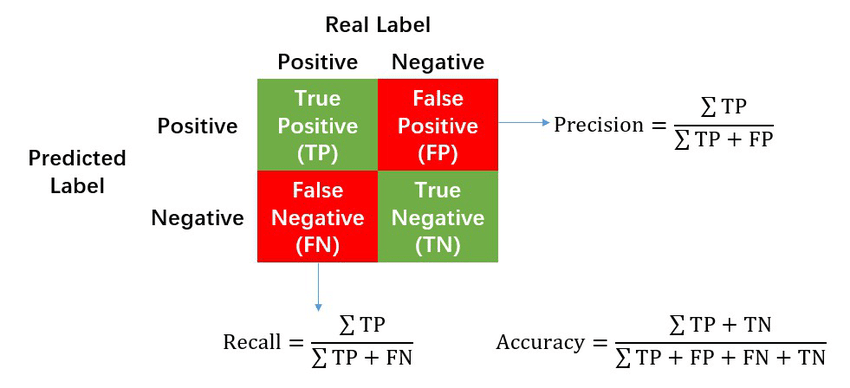

**Reference:** Ma, J., Ding, Y., Cheng, J. C., Tan, Y., Gan, V. J., & Zhang, J. (2019). Analyzing the leading causes of traffic fatalities using XGBoost and grid-based analysis: a city management perspective. IEEE Access, 7, 148059-148072.


In [39]:
rf = RandomForestClassifier(n_estimators=5500, min_samples_split=1500, random_state=222)

In [40]:
def make_predictions(data, predictors):
    train = data[data["Date"] < '2016-01-01']
    test = data[data["Date"] >= '2016-01-01']
    rf.fit(train[predictors], train["Target"])
    preds = rf.predict(test[predictors])
    precision = precision_score(test["Target"], preds)
    accuracy = accuracy_score(test["Target"], preds)

    return precision, accuracy

In [41]:
precision, accuracy = make_predictions(predict_df, predictors)
precision


0.7211678832116788

In [42]:
accuracy

0.6717527386541471

The model's precision and accuracy are quite good!

Next, we'll create a function called **make_prediction_2** for predicting the result of a future football match happening after the latest updated match day (after **08/05/2023** since our current dataset is updated until this date).

The dataset needs to be continuously updated so that the model can rely on the latest performance of participating team to produce more reliable results. 

This function will use data about matches before **the date of the match which we want to predict** for training the model. 

We won't use this function alone to predict a future football match. We'll incorporate it in a larger function to do that since this function also helps calculate necessary statistics for prediction.

In [43]:
def make_predictions_2(data, predictors, date):
    train = data[data["Date"] < date]
    test = data[data["Date"] == date]
    rf.fit(train[predictors], train["Target"])
    preds = rf.predict(test[predictors])
    
    return preds[-1]

Now, we're going to build a function called **single_prediction**, which takes in the home team name, away team name, match date, and referee name and prints a message to tell whether the home team is likely to win or not.

In [44]:
def single_prediction(hometeam, awayteam, date, referee):    
    df = data_1[(data_1["HomeTeam"] == hometeam) & (data_1["AwayTeam"] == awayteam)].copy()
    rolling_df = expanding_mean_2(df, numeric_cols, new_cols_1)
    r_4 = rolling_df.tail(1).copy()
    
    r_4.loc[:, 'FTHG':'HR/AR'] = 0
    r_4["Referee"] = referee
    r_4["Date"] = pd.to_datetime(date, dayfirst=True)
    r_4["Weekday"] = r_4["Date"].apply(lambda x: x.strftime("%A"))
    
    
    home_df = data_1[data_1["HomeTeam"] == hometeam].tail(10)
    r_5_h = home_df.groupby("HomeTeam", group_keys=False).apply(lambda x: rolling_mean_2(x, numeric_cols, 
                                                                 new_cols_2, new_cols_3, new_cols_4, new_cols_5))
    
    r_5_h.loc[:, 'FTHG':'HR/AR'] = 0
    r_5_h["Referee"] = referee
    r_5_h["Date"] = pd.to_datetime(date, dayfirst=True)
    r_5_h["Weekday"] = r_5_h["Date"].apply(lambda x: x.strftime("%A"))
    r_5_h["AwayTeam"] = awayteam

    away_df = data_1[data_1["AwayTeam"] == awayteam].tail(10)
    r_5_a = away_df.groupby("AwayTeam", group_keys=False).apply(lambda x: rolling_mean_2(x, numeric_cols, 
                                                                 new_cols_6, new_cols_7, new_cols_8, new_cols_9))

    r_5_a.loc[:, 'FTHG':'HR/AR'] = 0
    r_5_a["Referee"] = referee
    r_5_a["Date"] = pd.to_datetime(date, dayfirst=True)
    r_5_a["Weekday"] = r_5_a["Date"].apply(lambda x: x.strftime("%A"))
    r_5_a["HomeTeam"] = hometeam
    
    data_4 = r_5_h.merge(r_5_a)
    
    t = r_4.merge(data_4)
    
    df_list = []

    for team in [hometeam, awayteam]:
        team_df = data_1[(data_1 == team).any(axis=1)].copy()
        team_df_tail = team_df.tail(3).copy()
        rolling_df = rolling_mean_4(team_df_tail, numeric_cols, new_cols_10)

        rolling_df_1 = rolling_df.copy()
        
        rolling_df_1.loc[:, 'FTHG':'HR/AR'] = 0
        rolling_df_1["Referee"] = referee
        rolling_df_1["Date"] = pd.to_datetime(date, dayfirst=True)
        rolling_df_1["Weekday"] = rolling_df_1["Date"].apply(lambda x: x.strftime("%A"))
        rolling_df_1["HomeTeam"] = hometeam
        rolling_df_1["AwayTeam"] = awayteam


        df_list.append(rolling_df_1)
    
    df_list[0].rename(columns={col: col + ".h"  for col in new_cols_10}, inplace = True)
    df_list[1].rename(columns={col: col + ".a"  for col in new_cols_10}, inplace = True)

    full_df = df_list[0].merge(df_list[1])
    
    complete_df = full_df.merge(t)

        
    complete_df["Weekday_code"] = complete_df["Date"].dt.dayofweek
    complete_df["Month_code"] = complete_df["Date"].dt.month
    complete_df["HomeTeam_code"] = complete_df["HomeTeam"].astype("category").cat.codes
    complete_df["AwayTeam_code"] = complete_df["AwayTeam"].astype("category").cat.codes
    complete_df["Referee_code"] = complete_df["Referee"].astype("category").cat.codes
    
    predict_df_1 = pd.concat([predict_df,complete_df])
    
    predictors = predict_df_1.select_dtypes(include=np.number).columns
    
    predictors = predictors.tolist()
    predictors = [ele for ele in predictors if ele not in unwanted_cols]
    
    result_code = make_predictions_2(predict_df_1, predictors, date)
    
    if result_code == 1:
        print(hometeam + " is likely to win over " + awayteam)
        
    else:
        print(hometeam + " is likely to lose to or draw with " + awayteam) 

Now, we're going to use the function **single_prediction** to predict the result of an EPL football match between the home team Arsenal and the away team Brighton occurring on 14/05/2023 and refereed by A Marriner.

In [45]:
single_prediction("Arsenal", "Brighton", "2023-05-14", "A Madley")

Arsenal is likely to lose to or draw with Brighton


Our model predicted the result of the match correctly! The actual result was 0-3, a win for Brighton.

Now, we're going to use the function **single_prediction** to predict the result of an EPL football match between the home team Leicester and the away team Liverpool occurring on 15/05/2023 and refereed by C Pawson.

In [46]:
single_prediction("Leicester", "Liverpool", "2023-05-15", "C Pawson")

Leicester is likely to lose to or draw with Liverpool


Our model predicted the result of the match correctly! The actual result was 0-3, a win for Liverpool.

## Conclusions and suggestions for future research

The accuracy and precision rates of the prediction model are pretty good, indicating that the prediction model produces considerably reliable results. 


However, it is still suggested that further research could try searching for and take account of other elements such as weather, temperature, match happening time, match duration, and performance of participating teams in other competitions such as Champions League or FA Cup to see whether they help improve the accuracy and precision scores of the prediction model.